![](/Users/bensmacbookpro/Documents/Data_Science_Projects/Hospital_Admission_Machine_Lerning/Data/Cover_picture.png)

<!-- Main Title -->
<div style="
    background-color: #0277BD; 
    border-radius: 10px; 
    padding: 15px 20px; 
    font-size: 180%; 
    font-weight: bold; 
    color: white; 
    text-align: center;
    box-shadow: 3px 3px 5px #555;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Predicting Emergency Hospital Admissions from Football Injuries: A Machine Learning Approach</span>
</div>

<!-- Table of Contents Anchor -->
<a id="toc"></a>

<!-- Table of Contents -->
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Table of Contents</span>
</div>

- [Introduction](#introduction)
- [Data Collection](#data-collection)
- [Libraries and Settings](#libraries-and-settings)
- [Data Cleaning and Exploratory Data Analysis](#cleaning-eda)
- [Modeling and Model Evaluation](#modeling-evaluation)
- [Conclusion](#conclusion)
- [References](#references)

<!-- Introduction -->
<a id="introduction"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Introduction</span>
</div>

Every sport comes with its risks, and football is no exception — it's actually one of the most injury-prone recreational activities, with many players ending up in the Emergency Room (ER). In the fast-paced world of the Emergency Department (ED), one of the key challenges is quickly figuring out which patients need to be admitted to the hospital. This is where Machine Learning (ML) can really make a difference by helping doctors make those tough calls more accurately.

In this project, we set out to build ML models that could assist healthcare professionals in the ED, specifically focusing on football-related injuries. Our goal is to improve the decision-making process so that the right patients get admitted when they need to be, ultimately enhancing the quality of emergency care. We will start by selecting a simple model and then leverage PyCaret to experiment with a variety of algorithms. This approach will streamline the process and help us quickly identify the best model for achieving our objectives.


<!-- Data Collection -->
<a id="data-collection"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Data Collection</span>
</div>


The dataset for this study was sourced from the [National Electronic Injury Surveillance System (NEISS)](https://www.cpsc.gov/cgibin/NEISSQuery/UserCriteria.aspx?UserAff=CvbkBwSYvXoJ%2blc0Tfzwdg%3d%3d&UserAffOther=9OYR9kUytIsLilKZieD5xg%3d%3d), which is a nationally representative sample of hospitals across the United States and its territories. NEISS collects patient information from each participating hospital for every emergency visit involving an injury related to consumer products. The injury data is compiled from the ED of approximately 100 hospitals, selected as a probability sample from over 5,000 U.S. hospitals.

For this project, we focused on data related to emergency room visits for football - related injuries (code: 1211) over the past five years (2019 to 2023). The dataset includes various features such as age, race, gender, location of the injury, body part affected, preliminary diagnoses from triage, and the size of the care center. Our goal is to use this information to predict whether an individual will be admitted to the hospital.

For more detailed information on the NEISS dataset, please visit this [link](https://www.cpsc.gov/Research--Statistics/NEISS-Injury-Data).

<!-- Libraries and Settings -->
<a id="libraries-and-settings"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Libraries and Settings</span>
</div>

In [1]:
import os
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import graphviz 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn import tree
from pycaret.classification import *
import warnings
warnings.filterwarnings('ignore')

<!-- Libraries and Settings -->
<a id="cleaning-eda"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Data Cleaning and Exploratory Data Analysis</span>
</div>

In [2]:
# Load the dataset 
df = pd.read_csv('./Data/NEISS_Football_Injury_2019-2023/NEISS_Football_Injury_2019-2023.TXT', delimiter='\t')

df.head()

,CPSC_Case_Number,Treatment_Date,Age,Gender,Race,Other_Race,Hispanic,Body_Part,Diagnosis,Other_Diagnosis,Body_Part_2,Diagnosis_2,Other_Diagnosis_2,Disposition,Location,Fire_Involvement,Alcohol,Drug,Product_1,Product_2,Product_3,Narrative,Stratum,PSU,Weight
0,190103308,01/01/2019,5,1,0,NaN,0,76,59,NaN,NaN,NaN,NaN,1,0,0,0,0,1211,0,0,5YOM WAS PLAYING FOOTBALL AND HIT IN THE FACE WITH THE BALL LACERATION TO FACE,M,63,81.1520
1,190105541,01/02/2019,12,1,0,NaN,0,92,57,NaN,NaN,NaN,NaN,1,0,0,0,0,1211,0,0,12YOM WAS PLAYING FOOTBALL AND JAMMED LEFT MIDDLE FINGER FRACTURED FINGER,S,73,74.4362
2,190105542,01/02/2019,14,1,0,NaN,0,33,53,NaN,NaN,NaN,NaN,1,0,0,0,0,1211,0,0,14YOM WAS TACKLED WHILE PLAYING FOOTBALL AND SUSTAINED A CONTUSION TO LOWER ARM,S,73,74.4362
3,190106431,01/01/2019,23,1,0,NaN,2,31,64,NaN,NaN,NaN,NaN,1,9,0,0,0,1211,0,0,23YM C/O CHEST WALL PAIN BEGAN LAST SUN P PLAYING TACKLE FOOTBALL>>MS,V,21,16.4632
4,190107229,01/02/2019,17,1,1,NaN,1,35,71,PAIN,NaN,NaN,NaN,1,9,0,0,0,1211,0,0,"17YOM WAS PLAYING FOOTBALL AND HIS RIGHT KNEE TWISTED AND HE FELT A ""POP"" DX: KNEE PAIN'",M,100,81.1520


### NEISS Data Dictionary

| Variable         | Description/Code                                                                                                         |
|------------------|--------------------------------------------------------------------------------------------------------------------------|
| **CPSC_Case_Number**  | CPSC case number                                                                                                    |
| **Treatment_Date**    | Date of Treatment                                                                                                   |
| **Age**               | Age of Patient                                                                                                      |
|                      | 0 - Age Not Recorded                                                                                                 |
|                      | 2 to 120 - Age in Years                                                                                              |
|                      | 201 to 223 - Age 1 to 23 Months                                                                                      |
| **Sex**               | Sex of Patient                                                                                                      |
|                      | 0 - Not Recorded                                                                                                     |
|                      | 1 - Male                                                                                                             |
|                      | 2 - Female                                                                                                           |
|                      | 3 - Non-Binary/Other (NA before 2021)                                                                                |
| **Race**              | Race of Patient                                                                                                     |
|                      | 0 = Not Stated in ED Record                                                                                          |
|                      | 1 = White                                                                                                            |
|                      | 2 = Black/African American                                                                                           |
|                      | 3 = Other                                                                                                            |
|                      | 4 = Asian                                                                                                            |
|                      | 5 = American Indian/Alaska Native                                                                                    |
|                      | 6 = Native Hawaiian/Pacific Islander                                                                                 |
| **Other_Race**        | Description of Other Race (Used with Race=3)                                                                        |
| **Hispanic**          | Hispanic, Latino/Latina, or of Spanish Origin - available from 2019                                                 |
|                      | 0 - Unknown                                                                                                          |
|                      | 1 - Yes                                                                                                              |
|                      | 2 - No                                                                                                               |
| **Body_Part**         | Injured Body Part                                                                                                   |
|                      | 0 - Internal                                                                                                         |
|                      | 30 - Shoulder                                                                                                        |
|                      | 31 - Upper Trunk                                                                                                     |
|                      | 32 - Elbow                                                                                                           |
|                      | 33 - Lower Arm                                                                                                       |
|                      | 34 - Wrist                                                                                                           |
|                      | 35 - Knee                                                                                                            |
|                      | 36 - Lower Leg                                                                                                       |
|                      | 37 - Ankle                                                                                                           |
|                      | 38 - Pubic Region                                                                                                    |
|                      | 75 - Head                                                                                                            |
|                      | 76 - Face                                                                                                            |
|                      | 77 - Eyeball                                                                                                         |
|                      | 79 - Lower Trunk                                                                                                     |
|                      | 80 - Upper Arm                                                                                                       |
|                      | 81 - Upper Leg                                                                                                       |
|                      | 82 - Hand                                                                                                            |
|                      | 83 - Foot                                                                                                            |
|                      | 84 - 25-50% of Body                                                                                                  |
|                      | 85 - All Parts Body                                                                                                  |
|                      | 87 - Not Stated/Unk                                                                                                  |
|                      | 88 - Mouth                                                                                                           |
|                      | 89 - Neck                                                                                                            |
|                      | 92 - Finger                                                                                                          |
|                      | 93 - Toe                                                                                                             |
|                      | 94 - Ear                                                                                                             |
| **Body_Part_2**       | Injured Body Part 2 - available from 2019                                                                           |
| **Diagnosis**         | Injury Diagnosis                                                                                                    |
|                      | 41 - Ingestion                                                                                                       |
|                      | 42 - Aspiration                                                                                                      |
|                      | 46 - Burns, Electrical                                                                                               |
|                      | 47 - Burns, Not Specified                                                                                            |
|                      | 48 - Burns, Scald                                                                                                    |
|                      | 49 - Burns, Chemical                                                                                                 |
|                      | 50 - Amputaion                                                                                                       |
|                      | 51 - Burns, Thermal                                                                                                  |
|                      | 52 - Concussions                                                                                                     |
|                      | 53 - Contusions, Abrasions                                                                                           |
|                      | 54 - Crushing                                                                                                        |
|                      | 55 - Dislocation                                                                                                     |
|                      | 56 - Foreign Body                                                                                                    |
|                      | 57 - Fracture                                                                                                        |
|                      | 58 - Hematoma                                                                                                        |
|                      | 59 - Laceration                                                                                                      |
|                      | 60 - Dental Injury                                                                                                   |
|                      | 61 - Nerve Damage                                                                                                    |
|                      | 62 - Internal Organ Injury                                                                                           |
|                      | 63 - Puncture                                                                                                        |
|                      | 64 - Strain, Sprain                                                                                                  |
|                      | 65 - Anoxia                                                                                                          |
|                      | 66 - Hemorrhage                                                                                                      |
|                      | 67 - Electric Shock                                                                                                  |
|                      | 68 - Poisoning                                                                                                       |
|                      | 69 - Submersion                                                                                                      |
|                      | 71 - Other/Not Stated                                                                                                |
|                      | 72 - Avulsion                                                                                                        |
|                      | 73 - Burns, Radiation                                                                                                |
|                      | 74 - Dermatitis, Conjunctivitis                                                                                      |
| **Diagnosis_2**       | Injury Diagnosis 2 - available from 2019                                                                            |
| **Other_Diagnosis**   | Description of Other Diagnosis (Used with Diag=71)                                                                  |
| **Other_Diagnosis_2** | Description of Other Diagnosis 2 (Used with Diag2=71) - available from 2019                                         |
| **Disposition**       | Disposition                                                                                                         |
|                      | 1 - Treated/Examined and Released                                                                                    |
|                      | 2 - Treated and Transferred                                                                                          |
|                      | 4 - Treated and Admitted/Hospitalized                                                                                |
|                      | 5 - Held for Observation                                                                                             |
|                      | 6 - Left Without Being Seen                                                                                          |
|                      | 8 - Fatality, Incl. DOA, Died in ER                                                                                  |
|                      | 9 - Unknown, Not Stated                                                                                              |
| **Location**          | Incident Location                                                                                                   |
|                      | 0 - Not Recorded                                                                                                     |
|                      | 1 - Home                                                                                                             |
|                      | 2 - Farm/Ranch                                                                                                       |
|                      | 4 - Street or Highway                                                                                                |
|                      | 5 - Other Public Property                                                                                            |
|                      | 6 - Mobile/Manufactured Home                                                                                         |
|                      | 7 - Industrial                                                                                                       |
|                      | 8 - School/Daycare                                                                                                   |
|                      | 9 - Place of Recreation or Sports                                                                                    |
| **Fire_Involvement**  | Fire Involvement                                                                                                    |
|                      | 0 - No Fire Involved or Fire Involvement Not Recorded                                                                |
|                      | 1 - Fire Involved and Fire Department Attended                                                                       |
|                      | 2 - Fire Involved and Fire Department Did Not Attend                                                                 |
|                      | 3 - Fire Involved and Unknown Fire Department Attendance                                                             |
| **Alcohol**           | Consumed Alcohol Prior to or During the Incident - available from 2019                                              |
|                      | 0 - No/No Information                                                                                                |
|                      | 1 - Yes                                                                                                              |
| **Drug**              | Use of Drugs or Medication Contributed to the Incident or the Severity of the Injury - available from 2019          |
|                      | 0 - No/No information                                                                                                |
|                      | 1 - Yes                                                                                                              |
| **Product_1**         | Product Code (See NEISS Coding Manual for Details)                                                                  |
| **Product_2**         | Product Code 2 (See NEISS Coding Manual for Details)                                                                |
| **Product_3**         | Product Code 3 (See NEISS Coding Manual for Details) - available from 2019                                          |
| **Narrative**         | Description of Injury Event                                                                                         |
| **Stratum**           | Approximately 100 hospitals grouped into five strata                                                                |
| **PSU**               | Primary sampling unit (hospital) identifier                                                                         |
| **Weight**            | Weights adjusted for non-response, hospitals mergers and changes in sampling frame                                  |


In [3]:
# List all the columns 
df.columns

Index(['CPSC_Case_Number', 'Treatment_Date', 'Age', 'Gender', 'Race',
       'Other_Race', 'Hispanic', 'Body_Part', 'Diagnosis', 'Other_Diagnosis',
       'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'Disposition',
       'Location', 'Fire_Involvement', 'Alcohol', 'Drug', 'Product_1',
       'Product_2', 'Product_3', 'Narrative', 'Stratum', 'PSU', 'Weight'],
      dtype='object')

In [4]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isna().sum() / len(df) * 100).round(1)

# Create a DataFrame for better visualization
missing_percentage_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage (%)'])

# Display the DataFrame
print(missing_percentage_df)

                   Missing Percentage (%)
CPSC_Case_Number                      0.0
Treatment_Date                        0.0
Age                                   0.0
Gender                                0.0
Race                                  0.0
Other_Race                           95.9
Hispanic                              0.0
Body_Part                             0.0
Diagnosis                             0.0
Other_Diagnosis                      80.3
Body_Part_2                          88.0
Diagnosis_2                          88.0
Other_Diagnosis_2                    96.7
Disposition                           0.0
Location                              0.0
Fire_Involvement                      0.0
Alcohol                               0.0
Drug                                  0.0
Product_1                             0.0
Product_2                             0.0
Product_3                             0.0
Narrative                             0.0
Stratum                           

In [5]:
# Check the shape of the dataset
df.shape

(38811, 25)

Since our focus is on predicting hospital admission status, the **target** variable for this study is the "Disposition" variable in the dataset. This variable contains several unique values that indicate the outcome of each emergency room visit:

| Code | Description                                |
|------|--------------------------------------------|
| 0    | No injury                                  |
| 1    | Treated/examined and released              |
| 2    | Treated and transferred                    |
| 4    | Treated and admitted/hospitalized          |
| 5    | Held for observation                       |
| 6    | Left without being seen                    |
| 8    | Fatality including DOA, died in ER         |
| 9    | Unknown, not stated                        |

Before proceeding with the analysis, we will remove all entries where the "Disposition" value is 9, as these entries represent unknown outcomes or missing data. Next, we will categorize the remaining disposition values. Specifically, entries with a disposition of 4, 5, or 8 will be labeled as ‘admit,’ indicating that the patient was admitted to the hospital. All other disposition values will be labeled as ‘notadmit,’ meaning that the patient was not admitted.

In [6]:
# Replace 9 with NaN in the Disposition column
df.loc[df['Disposition']== 9., 'Disposition'] = np.nan
df = df.dropna(subset=['Disposition'])

# Recode individuals not admitted as "notadmit" and those admitted as "admit"
df.loc[~df['Disposition'].isin([4, 5, 8]), 'Disposition'] = 'notadmit'
df.loc[df['Disposition'].isin([4, 5, 8]), 'Disposition'] = 'admit'

# Display the value counts of Disposition
disposition_counts = df['Disposition'].value_counts()
print(disposition_counts)

Disposition
notadmit    37547
admit        1262
Name: count, dtype: int64


The dataset is highly **imbalanced**, which poses a challenge for our classification problem, especially since recall is important for this study. To ensure that the model effectively learns the characteristics of the minority class, oversampling techniques will be particularly beneficial. We plan to use methods like SMOTE (Synthetic Minority Over-sampling Technique) to address this imbalance issue.

Some features will be dropped from the dataset for various reasons:

- Unrelated to the Target Variable: CPSC_Case_Number, PSU, and Weight 
- High Percentage of Missing Values: Other_Race and Other_Diagnosis_2
- Redundancy in Product Features: Since our focus is on football-related injuries, where most cases involve the same product (code: 1211), the three "product" features provide little value

In [7]:
# Select only the important features
columns_selected = ['Treatment_Date', 'Age', 'Gender', 'Race', 'Hispanic', 'Body_Part', 'Diagnosis', 'Disposition', 'Location', 'Fire_Involvement', 'Alcohol', 'Drug', 'Stratum']

df_filtered = df[columns_selected]
df_filtered.head()

,Treatment_Date,Age,Gender,Race,Hispanic,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Alcohol,Drug,Stratum
0,01/01/2019,5,1,0,0,76,59,notadmit,0,0,0,0,M
1,01/02/2019,12,1,0,0,92,57,notadmit,0,0,0,0,S
2,01/02/2019,14,1,0,0,33,53,notadmit,0,0,0,0,S
3,01/01/2019,23,1,0,2,31,64,notadmit,9,0,0,0,V
4,01/02/2019,17,1,1,1,35,71,notadmit,9,0,0,0,M


In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38809 entries, 0 to 38810
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Treatment_Date    38809 non-null  object
 1   Age               38809 non-null  int64 
 2   Gender            38809 non-null  int64 
 3   Race              38809 non-null  int64 
 4   Hispanic          38809 non-null  int64 
 5   Body_Part         38809 non-null  int64 
 6   Diagnosis         38809 non-null  int64 
 7   Disposition       38809 non-null  object
 8   Location          38809 non-null  int64 
 9   Fire_Involvement  38809 non-null  int64 
 10  Alcohol           38809 non-null  int64 
 11  Drug              38809 non-null  int64 
 12  Stratum           38809 non-null  object
dtypes: int64(10), object(3)
memory usage: 4.1+ MB


In the filtered dataset, `Age` is a continuous variable. The rest features with int64 'Dtype' are categorical, even though they may be represented as numbers. 

In [9]:
# Selecting columns to change data type
columns_to_change = df_filtered.columns[2:12]  

# Converting the selected columns to str
df_filtered[columns_to_change] = df_filtered[columns_to_change].astype(str)

# Verifying the changes
print(df_filtered.dtypes)

Treatment_Date      object
Age                  int64
Gender              object
Race                object
Hispanic            object
Body_Part           object
Diagnosis           object
Disposition         object
Location            object
Fire_Involvement    object
Alcohol             object
Drug                object
Stratum             object
dtype: object


The `Age` column contains some values higher than 200, which represent the age in months (e.g., 216 indicates 16 months old). To address this, we will convert these values to the appropriate age in years. 

In [10]:
# Change the datatype of 'Age' to float
df_filtered['Age'] = df_filtered['Age'].astype('float')

# Convert the age in weeks to age in years
df_filtered.loc[df_filtered['Age']>=200, 'Age'] = ((df_filtered['Age'] - 200)/12).round(1)

This dataset includes data from 2019 to 2023. Next, let's examine the distribution of emergency visits by `year`, `month`, and `week`.

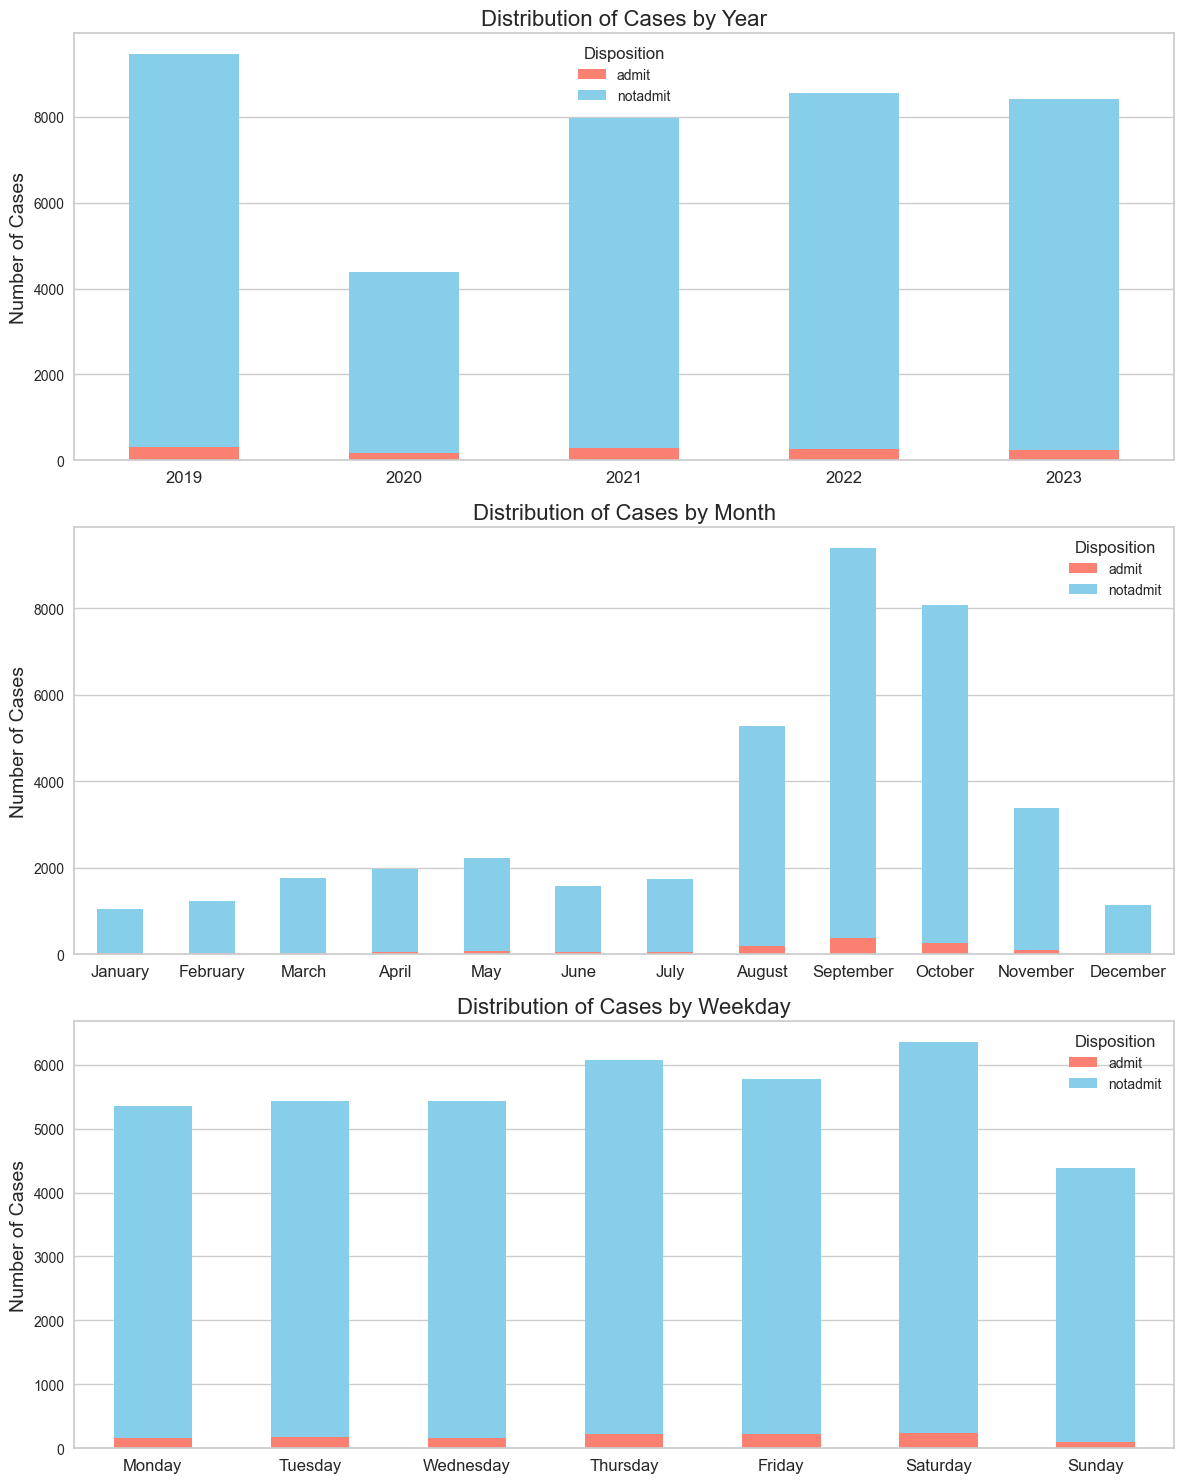

In [11]:
# Convert Treatment_Date to datetime
df_filtered['Treatment_Date'] = pd.to_datetime(df_filtered['Treatment_Date'], format='%m/%d/%Y')

# Extract year, month, and weekday from the date
df_filtered['year'] = df_filtered['Treatment_Date'].dt.year
df_filtered['month'] = df_filtered['Treatment_Date'].dt.month
df_filtered['weekday'] = df_filtered['Treatment_Date'].dt.dayofweek

# Map the month number to month name
df_filtered['month'] = df_filtered['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                                 5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                                 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Map the weekday number to weekday name and ensure the order is from Monday to Sunday
df_filtered['weekday'] = df_filtered['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                                                     4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Grouping by 'year', 'month', 'weekday' and 'Disposition'
year_group = df_filtered.groupby(['year', 'Disposition']).size().unstack()
month_group = df_filtered.groupby(['month', 'Disposition']).size().unstack().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
weekday_group = df_filtered.groupby(['weekday', 'Disposition']).size().unstack().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Yearly stacked bar plot
year_group.plot(kind='bar', stacked=True, ax=axes[0], color=['salmon', 'skyblue'])
axes[0].set_title('Distribution of Cases by Year', fontsize=16)
axes[0].set_ylabel('Number of Cases', fontsize=14)
axes[0].tick_params(axis='x',rotation=0, labelsize=12)
axes[0].set_xlabel(None)
axes[0].grid(axis='x', visible=False) 

# Monthly stacked bar plot
month_group.plot(kind='bar', stacked=True, ax=axes[1], color=['salmon', 'skyblue'])
axes[1].set_title('Distribution of Cases by Month', fontsize=16)
axes[1].set_ylabel('Number of Cases', fontsize=14)
axes[1].tick_params(axis='x', rotation=0, labelsize=12)
axes[1].set_xlabel(None)
axes[1].grid(axis='x', visible=False) 

# Weekday stacked bar plot
weekday_group.plot(kind='bar', stacked=True, ax=axes[2], color=['salmon', 'skyblue'])
axes[2].set_title('Distribution of Cases by Weekday', fontsize=16)
axes[2].set_ylabel('Number of Cases', fontsize=14)
axes[2].tick_params(axis='x', rotation=0, labelsize=12)
axes[2].set_xlabel(None)
axes[2].grid(axis='x', visible=False) 

# Adjust layout
plt.tight_layout()
plt.show()

The decrease in ER visits in 2020 is expected, as it correlates with the lockdown during the COVID-19 pandemic, during which people spent less time engaging in sports, including playing football.

In [12]:
df_filtered.head()

,Treatment_Date,Age,Gender,Race,Hispanic,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Alcohol,Drug,Stratum,year,month,weekday
0,2019-01-01,5.0,1,0,0,76,59,notadmit,0,0,0,0,M,2019,January,Tuesday
1,2019-01-02,12.0,1,0,0,92,57,notadmit,0,0,0,0,S,2019,January,Wednesday
2,2019-01-02,14.0,1,0,0,33,53,notadmit,0,0,0,0,S,2019,January,Wednesday
3,2019-01-01,23.0,1,0,2,31,64,notadmit,9,0,0,0,V,2019,January,Tuesday
4,2019-01-02,17.0,1,1,1,35,71,notadmit,9,0,0,0,M,2019,January,Wednesday


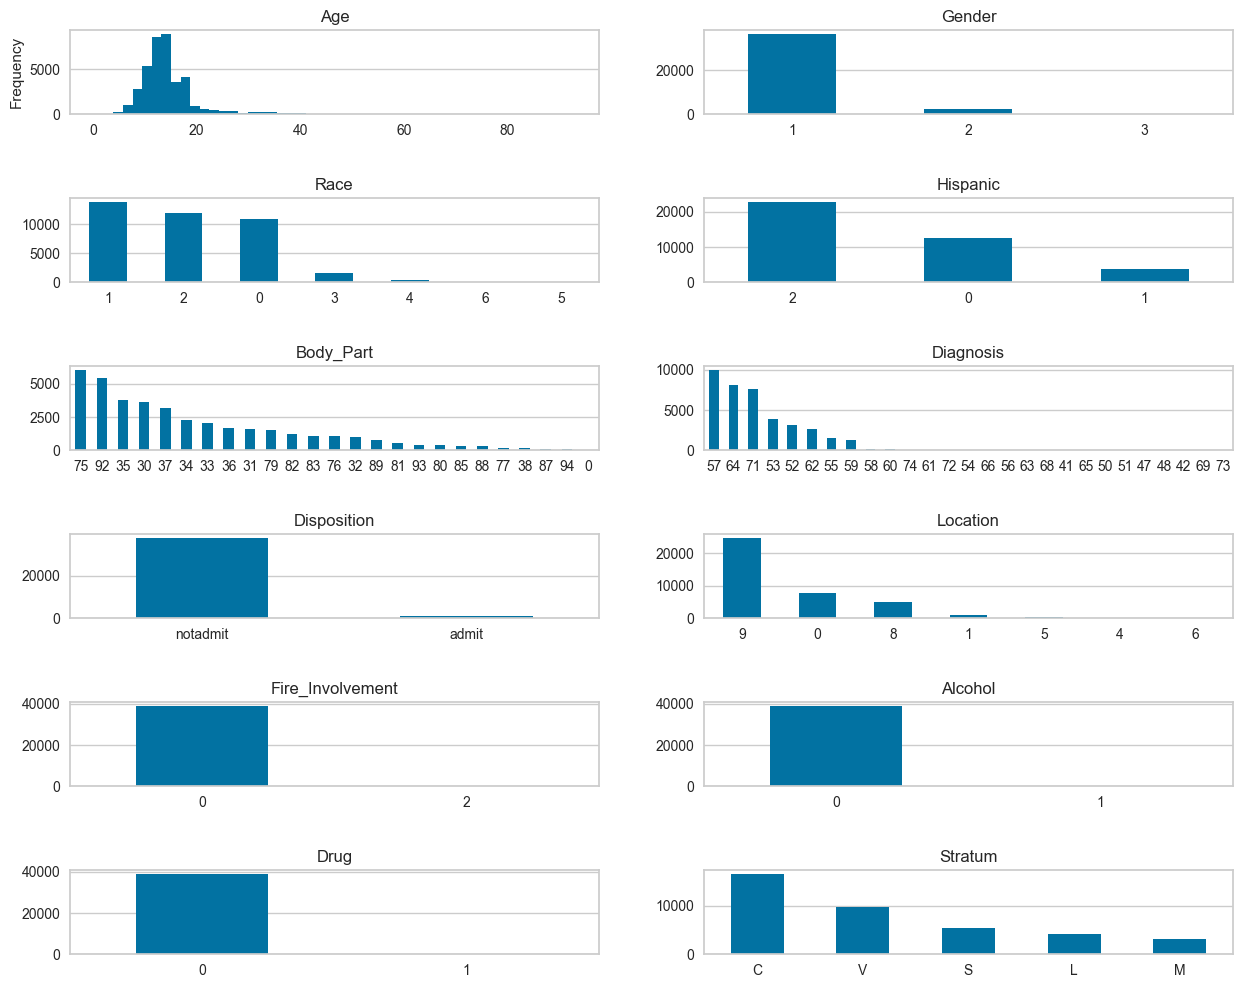

In [13]:
# Check the distribution in other columns
fig = plt.figure(figsize=(15,12)) 
fig.subplots_adjust(hspace=1, wspace=0.2) 
for idx, col in enumerate(df_filtered.columns[list(range(1,13))]):
    ax = fig.add_subplot(6,2,idx+1) 
    if col == 'Age':
        df_filtered[col].plot(kind='hist', bins=50, title=col) 
    else:
        df_filtered[col].value_counts().plot(kind='bar', title=col)
    ax.set_xlabel('')  # Remove x-axis title
    ax.grid(axis='x', visible=False)
    ax.tick_params(axis='x',rotation=0) 

plt.show()        

In [14]:
# Drop two more columns as they are not useful
df_filtered = df_filtered.drop(columns=['Treatment_Date', 'year'])

In [15]:
# Select the categorical variables
categorical_cols = ['Gender', 'Race', 'Hispanic', 'Body_Part', 'Diagnosis', 'Location', 'Fire_Involvement', 'Alcohol', 'Drug', 'Stratum', 'month', 'weekday']

# Create dummy variables
df_dummy = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)

# Convert one-hot encoded columns (which have 'True'/'False') to 1/0
one_hot_cols = df_dummy.columns.difference(['Age', 'Disposition'])
df_dummy[one_hot_cols] = df_dummy[one_hot_cols].astype(int)

df_dummy.head()

,Age,Disposition,Gender_2,Gender_3,Race_1,Race_2,Race_3,Race_4,Race_5,Race_6,Hispanic_1,Hispanic_2,Body_Part_30,Body_Part_31,Body_Part_32,Body_Part_33,Body_Part_34,Body_Part_35,Body_Part_36,Body_Part_37,Body_Part_38,Body_Part_75,Body_Part_76,Body_Part_77,Body_Part_79,Body_Part_80,Body_Part_81,Body_Part_82,Body_Part_83,Body_Part_85,Body_Part_87,Body_Part_88,Body_Part_89,Body_Part_92,Body_Part_93,Body_Part_94,Diagnosis_42,Diagnosis_47,Diagnosis_48,Diagnosis_50,Diagnosis_51,Diagnosis_52,Diagnosis_53,Diagnosis_54,Diagnosis_55,Diagnosis_56,Diagnosis_57,Diagnosis_58,Diagnosis_59,Diagnosis_60,Diagnosis_61,Diagnosis_62,Diagnosis_63,Diagnosis_64,Diagnosis_65,Diagnosis_66,Diagnosis_68,Diagnosis_69,Diagnosis_71,Diagnosis_72,Diagnosis_73,Diagnosis_74,Location_1,Location_4,Location_5,Location_6,Location_8,Location_9,Fire_Involvement_2,Alcohol_1,Drug_1,Stratum_L,Stratum_M,Stratum_S,Stratum_V,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,5.0,notadmit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12.0,notadmit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,14.0,notadmit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,23.0,notadmit,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,17.0,notadmit,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
df_dummy.shape

(38809, 92)

<!-- Libraries and Settings -->
<a id="modeling-evaluation"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Modelling and Model Evaluation</span>
</div>

### Decision Tree

In [17]:
# Set "X" variables (predictors) and "Y" (outcome)
X = df_dummy.loc[:, df_dummy.columns != 'Disposition'] 
Y = df_dummy['Disposition']

As shown earlier, there is a class imbalance, as 'admit' cases constitute less than 1% of the data. We could consider resampling the training dataset to address this imbalance.

In [18]:
# split up our training and testing data and oversample the minority class of our training data
X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train_imbalanced, y_train_imbalanced)
print(Counter(y_train))
print(Counter(y_test))

Counter({'notadmit': 26252, 'admit': 26252})
Counter({'notadmit': 11295, 'admit': 348})


In the test set, we maintain the original data distribution to reflect real-world conditions during evaluation.

**Training a Decision Tree Model**  

With the training data balanced, we can proceed to train a classifier. We'll begin with a simple model, the Decision Tree classifier. To optimize the model's performance, we'll use cross-validation combined with grid search to find the best combination of hyperparameters from a predefined grid.

In [19]:
# Define the parameter grid for the DecisionTreeClassifier
param_grid = {
    'max_depth': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a DecisionTreeClassifier with a fixed random state for reproducibility
clf = tree.DecisionTreeClassifier(random_state=42)

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='recall_macro', return_train_score=True, n_jobs=-1)

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from the grid search
best_clf = grid_search.best_estimator_

# Perform cross-validation on the best model using the specified scoring metrics
scoring = ['accuracy', 'balanced_accuracy', 'precision_macro', 'recall_macro', 'roc_auc']
scores = cross_validate(best_clf, X_train, y_train, scoring=scoring, return_estimator=True)

# Iterate over the keys in the scores dictionary to print the average of each scoring metric
for metric in scores.keys():
    if metric != 'estimator':
        print(f"{metric}: {np.mean(scores[metric]).round(3)}")


fit_time: 0.088
score_time: 0.145
test_accuracy: 0.741
test_balanced_accuracy: 0.741
test_precision_macro: 0.813
test_recall_macro: 0.741
test_roc_auc: 0.828


**Evaluation**

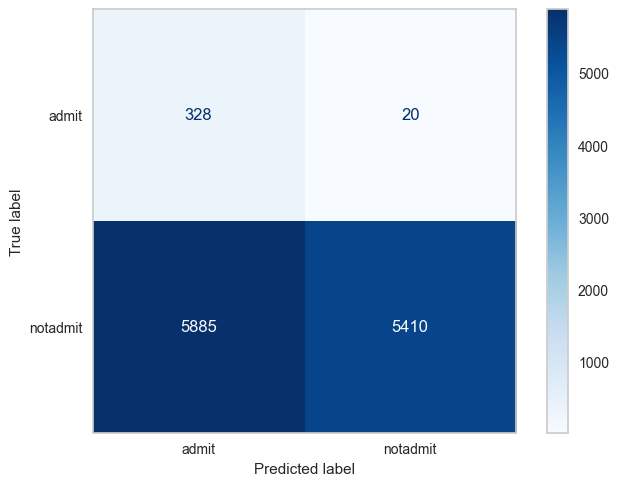

In [20]:
# Predict on test data
y_pred = best_clf.predict(X_test)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test, cmap=plt.cm.Blues)

# Hide the grid
disp.ax_.grid(False)

# Show the plot
plt.show()

              precision    recall  f1-score   support

       admit       0.05      0.94      0.10       348
    notadmit       1.00      0.48      0.65     11295

    accuracy                           0.49     11643
   macro avg       0.52      0.71      0.37     11643
weighted avg       0.97      0.49      0.63     11643



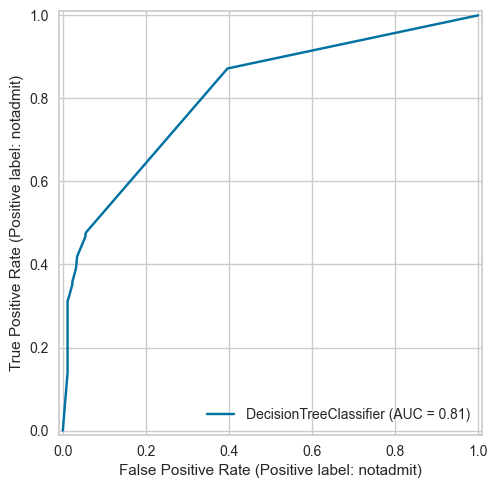

In [21]:
# Print out the classification report
print(classification_report(y_test, y_pred))

# Plot ROC curve
RocCurveDisplay.from_estimator(best_clf, X_test, y_test)
plt.show()

**Visualizing the Tree**

In [22]:
# Explicitly set the path to the dot executable
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'

# Explicitly set the path to the dot executable
graphviz.set_default_engine('dot')
graphviz.set_default_format('png')

if (best_clf.tree_.node_count < 100):
    dot_data = tree.export_graphviz(best_clf, out_file=None, 
                                    feature_names=X.columns,
                                    class_names=['admit','notadmit']) 
    graph = graphviz.Source(dot_data)
    graph.render("/Users/bensmacbookpro/Documents/Data_Science_Projects/Hospital_Admission_Machine_Lerning/neiss") 

### Using PyCaret

As demonstrated above, the decision tree model achieved an AUC of 0.81, which is a solid result, though there is still room for improvement. This is just one model, and next, we'll leverage PyCaret to efficiently explore and compare a variety of models. PyCaret simplifies the model selection process by automatically testing multiple models and allowing us to easily choose the ones we want to fine-tune further based on metrics such as accuracy, AUC, precision, and recall.

In [23]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38809 entries, 0 to 38810
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               38809 non-null  float64
 1   Gender            38809 non-null  object 
 2   Race              38809 non-null  object 
 3   Hispanic          38809 non-null  object 
 4   Body_Part         38809 non-null  object 
 5   Diagnosis         38809 non-null  object 
 6   Disposition       38809 non-null  object 
 7   Location          38809 non-null  object 
 8   Fire_Involvement  38809 non-null  object 
 9   Alcohol           38809 non-null  object 
 10  Drug              38809 non-null  object 
 11  Stratum           38809 non-null  object 
 12  month             38809 non-null  object 
 13  weekday           38809 non-null  object 
dtypes: float64(1), object(13)
memory usage: 5.4+ MB


In [24]:
# Convert relevant columns to categorical types
categorical_columns = [
    'Gender', 'Race', 'Hispanic', 'Body_Part', 'Diagnosis', 'Location',
    'Fire_Involvement', 'Alcohol', 'Drug', 'Stratum', 'month', 'weekday'
]

for col in categorical_columns:
    df_filtered[col] = df_filtered[col].astype('category')

# Encode target variable
df_filtered.loc[df_filtered.Disposition == 'admit', 'Disposition'] = 1
df_filtered.loc[df_filtered.Disposition == 'notadmit', 'Disposition'] = 0
df_filtered['Disposition'] = df_filtered['Disposition'].astype(int)

# Verify target variable encoding
print(Counter(df_filtered['Disposition']))

# Setup PyCaret with the preprocessed data
grid = setup(
    data=df_filtered, 
    target='Disposition', 
    verbose=True, 
    fix_imbalance=True, 
    bin_numeric_features=['Age'], 
    log_experiment=True, 
    experiment_name='ha_1', 
    fold=5
)

Counter({0: 37547, 1: 1262})


,Description,Value
0,Session id,3859
1,Target,Disposition
2,Target type,Binary
3,Original data shape,"(38809, 14)"
4,Transformed data shape,"(64209, 99)"
5,Transformed train set shape,"(52566, 99)"
6,Transformed test set shape,"(11643, 99)"
7,Numeric features,1
8,Categorical features,12
9,Preprocess,True


In [25]:
# Compare baseline models
topmodels = compare_models(n_select = len(models()))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9675,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1180
rf,Random Forest Classifier,0.9660,0.8490,0.2185,0.4522,0.2938,0.2785,0.2984,0.6260
lightgbm,Light Gradient Boosting Machine,0.9651,0.8880,0.3238,0.4493,0.3759,0.3584,0.3638,0.6240
et,Extra Trees Classifier,0.9648,0.8032,0.2661,0.4349,0.3298,0.3128,0.3230,0.7900
dt,Decision Tree Classifier,0.9507,0.6524,0.2967,0.2677,0.2813,0.2559,0.2563,0.2360
gbc,Gradient Boosting Classifier,0.9272,0.8854,0.5662,0.2387,0.3357,0.3039,0.3360,1.4200
ada,Ada Boost Classifier,0.8919,0.8799,0.6273,0.1756,0.2743,0.2355,0.2924,0.4600
lr,Logistic Regression,0.8303,0.8918,0.7961,0.1369,0.2337,0.1887,0.2843,0.3340
svm,SVM - Linear Kernel,0.8262,0.8892,0.8041,0.1364,0.2326,0.1875,0.2844,0.1760
knn,K Neighbors Classifier,0.8225,0.7448,0.5674,0.1014,0.1721,0.1237,0.1832,0.7720


[LightGBM] [Info] Number of positive: 21026, number of negative: 21026
[LightGBM] [Info] Number of positive: 21027, number of negative: 21027
[LightGBM] [Info] Number of positive: 21026, number of negative: 21026
[LightGBM] [Info] Number of positive: 21026, number of negative: 21026
[LightGBM] [Info] Number of positive: 21027, number of negative: 21027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16363
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037419 seconds.
You can set `force_

2024/08/18 21:54:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 21:54:11 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 21:54:13 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 21:54:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 21:54:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/18 21:54:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

The output of this function is a scoring grid with average cross-validated scores.

In [26]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


`LightGBM` provides the best overall metrics in terms of precision, AUC, and accuracy. However, our primary focus is on maximizing recall, as it's crucial to minimize false negatives related to hospital admissions.

In [27]:
# Retrieve the LightGBM model
lightgbm = topmodels[2]

# Display the current hyperparameters
lightgbm_hyperparams = lightgbm.get_params()
print(lightgbm_hyperparams)


{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 3859, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


To improve the recall of the LightGBM model, we'll try hyperparameter tuning.

**Hyperparameter Tuning**
   - Increase `num_leaves`: This increases the complexity of the model, allowing it to capture more information, which can help improve recall. 
   - Increase `n_estimators`: Raising the number of boosting rounds (trees) can lead to better model performance.
   - Decrease `learning_rate`: A lower learning rate with a higher number of trees (`n_estimators`) may make the model more robust and improve recall.
   - Decrease `min_child_samples`: This can allow the model to grow larger trees, potentially capturing more patterns in the data.
   - Set `class_weight` to 'balanced' to automatically adjust the weights inversely proportional to class frequencies.

In [28]:
# Calculate the number of positive and negative samples
total_negative_samples = sum(y_test == 'notadmit')
total_positive_samples = sum(y_test == 'admit')

# Change these parameters
lightgbm_model_tuned = create_model('lightgbm', num_leaves=45, n_estimators=150, learning_rate = 0.01, min_child_samples = 20, class_weight = 'balanced')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,0.8729,0.5367,0.2369,0.3287,0.2969,0.3249
1,0.9264,0.8887,0.6136,0.2455,0.3506,0.3191,0.3572
2,0.9247,0.8747,0.6136,0.2405,0.3456,0.3137,0.3529
3,0.9220,0.8945,0.6158,0.2344,0.3396,0.3069,0.3478
4,0.9209,0.8792,0.5819,0.2244,0.3239,0.2905,0.3282
Mean,0.9245,0.8820,0.5923,0.2363,0.3377,0.3054,0.3422
Std,0.0028,0.0083,0.0305,0.0070,0.0100,0.0105,0.0132


2024/08/18 22:01:53 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In this case, hyperparameter tuning greatly improves recall (0.5923 vs 0.3238) with a slight trade-off in accuracy (0.9245 vs. 0.9651) and AUC (0.8820 vs. 0.8880).

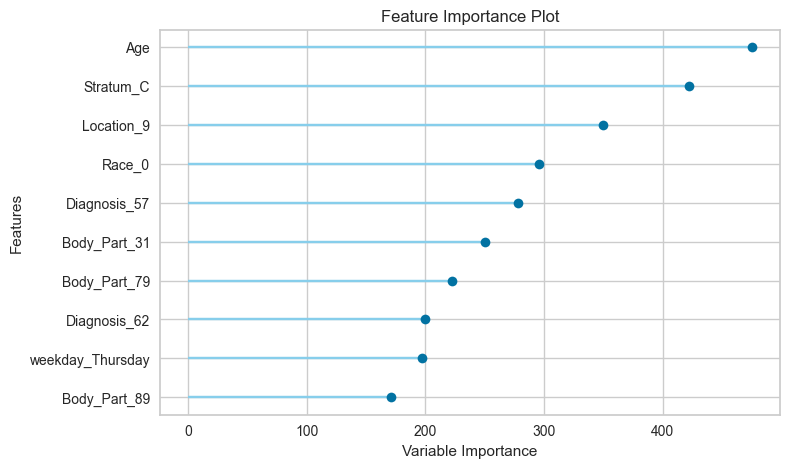

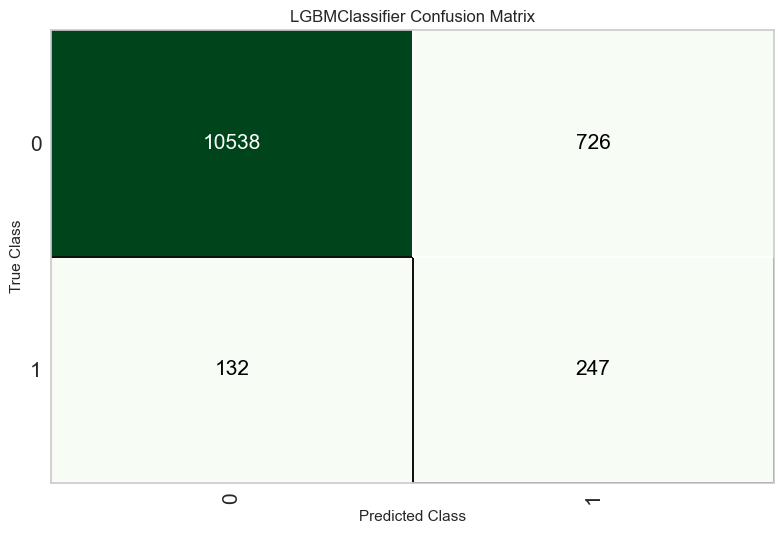

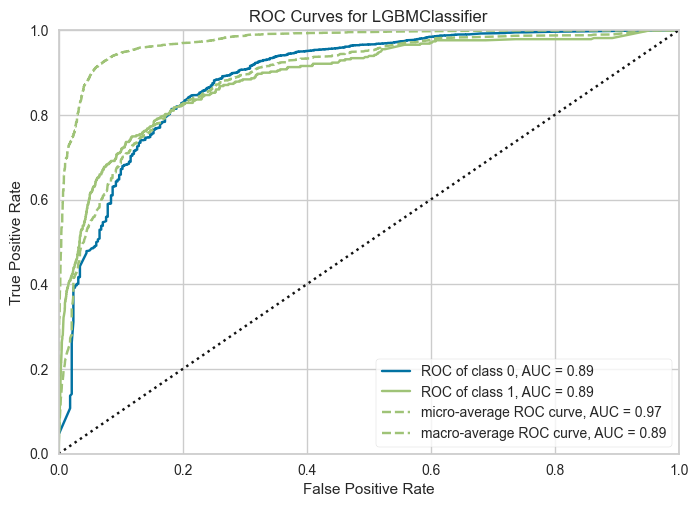

In [29]:
# Plot feature importannce
plot_model(lightgbm_model_tuned, plot='feature')

# Plot confusion matrix
plot_model(lightgbm_model_tuned, plot='confusion_matrix')

# Plot AUC Curve
plot_model(lightgbm_model_tuned, plot='auc')

**Blend Models**

Others models such as AdaBoost (ada) and logistic regression (lr) provide a good balance, offering moderate recall with better precision, F1 scores, and accuracy. 

In [36]:
# Get other good models
ada = topmodels[6]
lr = topmodels[7]

# Combine multiple models into one ensemble model
blender = blend_models(estimator_list=[lightgbm_model_tuned, ada, lr], method='auto')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8857,0.8813,0.6610,0.1726,0.2737,0.2341,0.2978
1,0.8881,0.8982,0.7386,0.1879,0.2995,0.2614,0.3355
2,0.8912,0.8987,0.7045,0.1870,0.2956,0.2576,0.3256
3,0.8877,0.9040,0.7345,0.1876,0.2989,0.2605,0.3339
4,0.8931,0.9068,0.7345,0.1958,0.3092,0.2717,0.3430
Mean,0.8892,0.8978,0.7146,0.1862,0.2954,0.2570,0.3272
Std,0.0026,0.0089,0.0295,0.0075,0.0117,0.0124,0.0157


2024/08/18 22:08:09 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


In [41]:
# Predict using the blended model with a custom decision threshold
predict_model(blender, probability_threshold=0.42)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8280,0.9042,0.8285,0.1394,0.2387,0.1938,0.2949


,Age,Gender,Race,Hispanic,Body_Part,Diagnosis,Location,Fire_Involvement,Alcohol,Drug,Stratum,month,weekday,Disposition,prediction_label,prediction_score
7107,16.0,1,1,2,92,64,9,0,0,0,S,October,Monday,0,0,0.8118
31685,10.0,1,1,2,35,72,9,0,0,0,L,April,Monday,0,0,0.6866
8023,13.0,1,2,1,31,61,0,0,0,0,C,July,Sunday,1,1,0.4459
30085,13.0,2,0,0,75,62,8,0,0,0,C,November,Thursday,0,0,0.6778
19114,10.0,1,0,0,75,52,9,0,0,0,C,October,Thursday,0,1,0.4511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26168,13.0,1,0,1,30,57,8,0,0,0,V,September,Saturday,0,0,0.7233
35330,12.0,1,2,2,36,53,9,0,0,0,C,September,Wednesday,0,0,0.7950
25552,15.0,1,1,2,75,52,9,0,0,0,M,August,Monday,0,0,0.7543
288,23.0,1,1,2,37,64,9,0,0,0,V,February,Wednesday,0,0,0.7774


We are blending the Gradient lightgbm (lightgbm_model_tuned), gbc (Boosting Classifier), and lr (logistic regression) models together to make a blended model and are storing it in the blender variable.

**Saving the blended model**

In [43]:
# Save the model
save_model(blender, 'blender_model_lightgbm-gbc-lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Gender', 'Race', 'Hispanic',
                                              'Body_Par...
                                               ('Logistic Regression',
                                                LogisticRegre

<!-- Libraries and Settings -->
<a id="conclusion"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">Conclusion</span>
</div>

Using data from over 38,000 emergency department visits related to football injuries in the past five years (2019 - 2023), we developed machine learning models that accurately identify high-risk patients and distinguish them from stable, low-risk patients who can be safely discharged. The PyCaret package significantly reduced the time required for training and tuning these models. This method can serve as a valuable and cost-effective tool for clinicians to decide whether or not to admit a patient from the ED.

In summary, we present an affordable clinical decision support tool based on readily available patient data. This tool is designed to assist emergency physicians in making hospital admission decisions, highlighting the growing role of machine learning models in healthcare.

<!-- Libraries and Settings -->
<a id="references"></a>
<div style="
    background-color: #4FB3F7; 
    border-radius: 8px; 
    padding: 10px 15px; 
    font-size: 120%; 
    font-weight: bold; 
    color: #ffffff; 
    text-align: center;
    margin-top: 20px;
    box-sizing: border-box;">
    <span style="font-family: 'Arial', sans-serif;">References</span>
</div>

- Consumer Product Safety Commission. National Electronic Injury Surveillance System 2004-2023 on NEISS Online Database, released April, 2024. Generated at https://www.cpsc.gov/cgibin/NEISSQuery/home.aspx.
- pycaret.org. PyCaret, April 2020. URL https://pycaret.org/. PyCaret version 1.0.0.

<div style="
    text-align: center;
    margin-top: 20px;">
    <a href="#toc" style="font-size: 110%; font-weight: bold; color: #0277BD; text-decoration: none;">
        ☝️  Back to Table of Contents
    </a>
</div>
